In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
train=pd.read_csv("/kaggle/input/store-sales-time-series-forecasting/train.csv",index_col="id")

print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB
None


,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [3]:
print(train.family.describe())
train.family.unique()

count        3000888
unique            33
top       AUTOMOTIVE
freq           90936
Name: family, dtype: object


array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [4]:
train.nunique()

date             1684
store_nbr          54
family             33
sales          379610
onpromotion       362
dtype: int64

# Creating a new DataFrame where sales across all stores and all family of products have been added up for each day

In [5]:
datelist=train.date.unique().tolist()

# The new DataFrame
train_all_combined=pd.DataFrame({'date':datelist,'sales':[0 for i in datelist]})

# Code to fill the sales column
j=0
salesum=0.0
k=0
for i in range(len(train.index)):
    j=j+1
    salesum=salesum+train.loc[i,'sales']
    if j==33*54:
        train_all_combined['sales'][k]=salesum
        salesum=0
        j=0
        k=k+1

        
train_all_combined.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,sales
0,2013-01-01,2511
1,2013-01-02,496092
2,2013-01-03,361461
3,2013-01-04,354459
4,2013-01-05,477350


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


train_all_combined['date']=pd.to_datetime(train_all_combined['date'])
train_all_combined.set_index('date',inplace=True)

In [7]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


In [8]:
train_all_combined['time_dummy'] = np.arange(train_all_combined.shape[0])
train_all_combined.head()

,sales,time_dummy
date,,
2013-01-01,2511,0
2013-01-02,496092,1
2013-01-03,361461,2
2013-01-04,354459,3
2013-01-05,477350,4


**LinePlot and BarPlot of a month of sales:**


In [9]:
# Selecting February rows
dftoplot=train_all_combined.loc['2013-02-01':'2013-02-28']

<AxesSubplot:title={'center':'Sales of February'}, xlabel='date', ylabel='sales'>

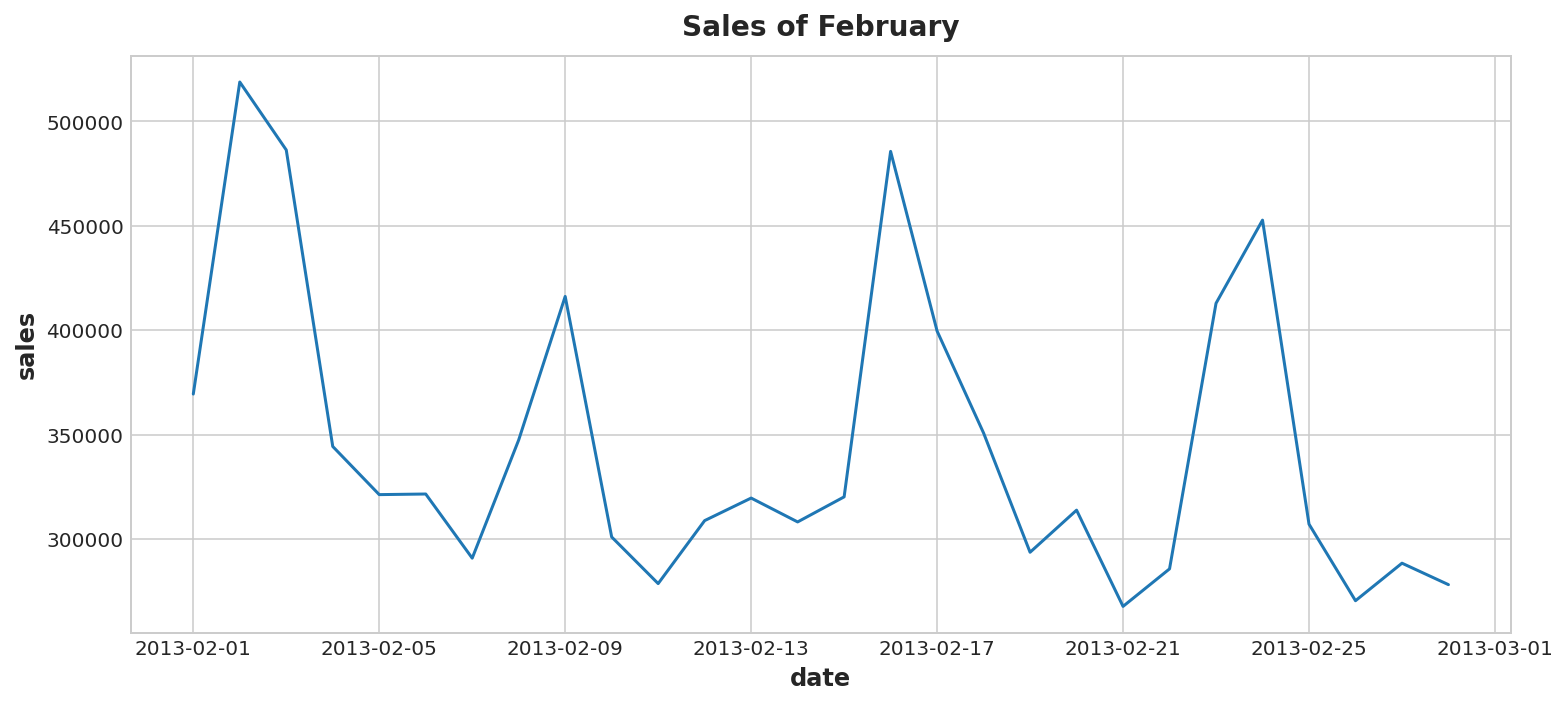

In [10]:
#plt.figure(figsize=(40,8))
plt.title('Sales of February')
sns.lineplot(data=dftoplot,x=dftoplot.index,y=dftoplot.sales)

<AxesSubplot:title={'center':'Sales of February'}, xlabel='date', ylabel='sales'>

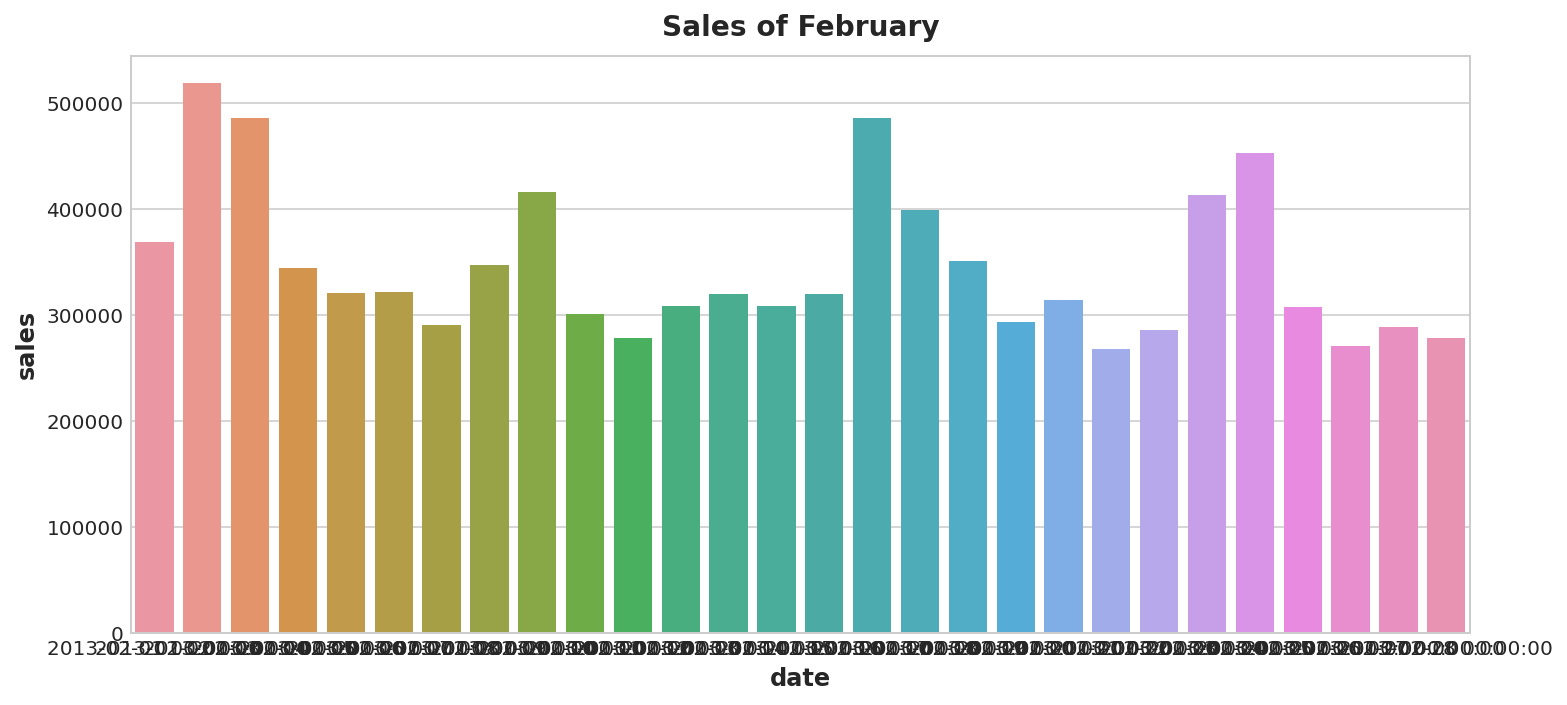

In [11]:
#plt.figure(figsize=(40,8))
plt.title('Sales of February')
sns.barplot(data=dftoplot,x=dftoplot.index,y=dftoplot.sales)

**OBSERVATION** : As wages are paid out to public on 15th and at the end of every month, we can see the overall sales peak at the start of and just after the middle of **every** month.

**Fitted a regression line for the first 4 years :**

<AxesSubplot:xlabel='time_dummy', ylabel='sales'>

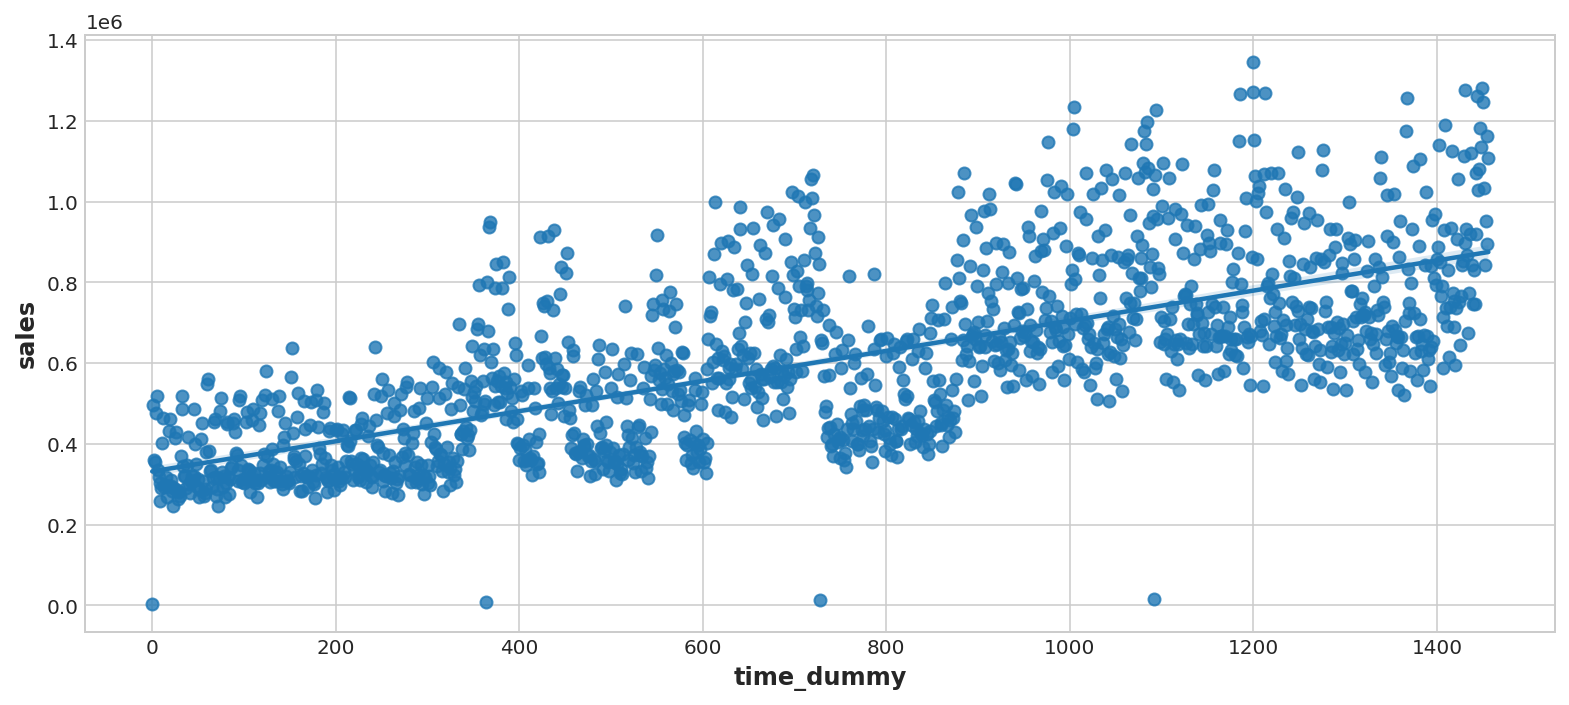

In [12]:
dftoplot=train_all_combined.loc['2013-01-01':'2016-12-31']
#plt.figure(figsize=(40,8))
sns.regplot(data=dftoplot,x=dftoplot.time_dummy,y=dftoplot.sales)

**Plotting the moving average :**

<AxesSubplot:title={'center':'365-Day Moving Average'}, xlabel='date'>

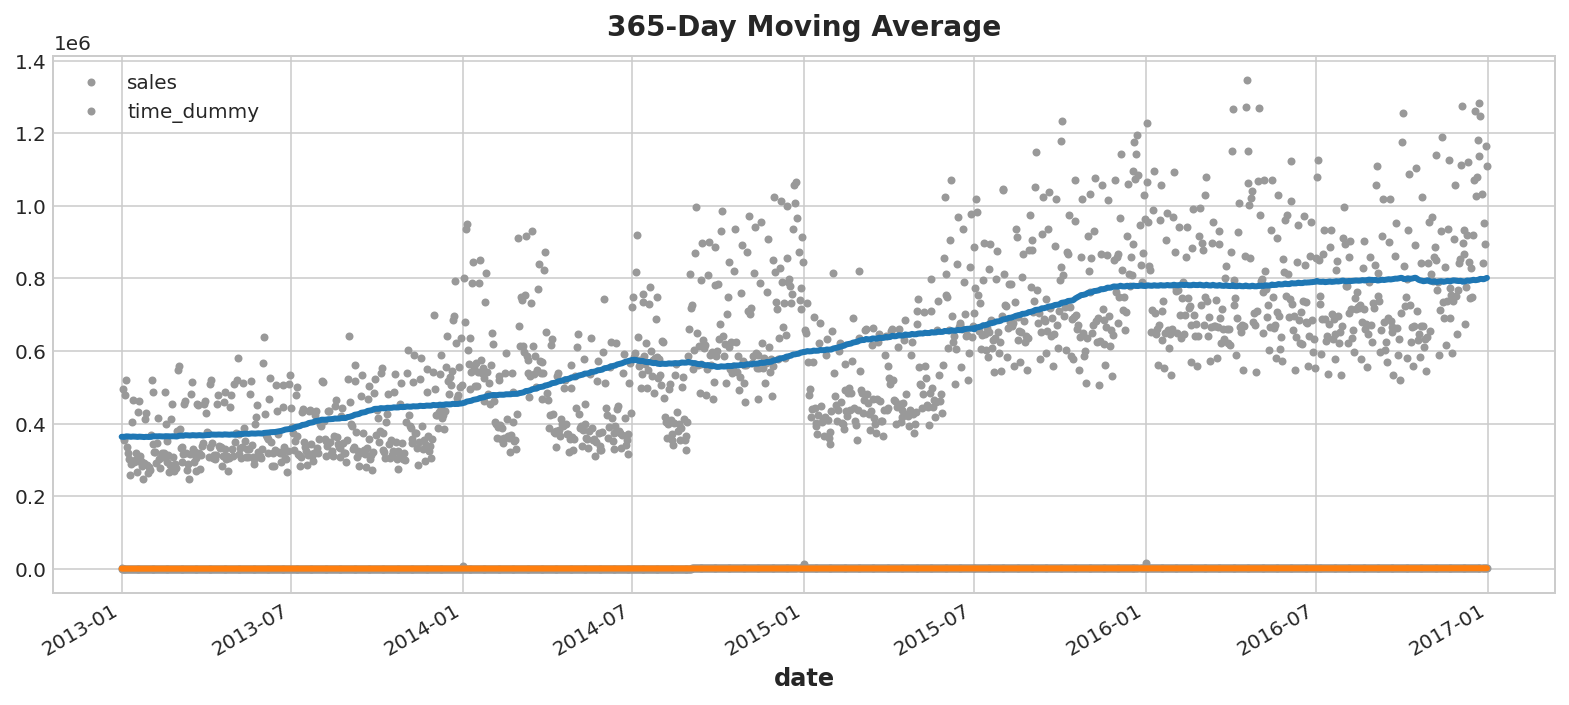

In [13]:
moving_avg=dftoplot.rolling(window=365,center=True,min_periods=183).mean()
ax = dftoplot.plot(style=".", color="0.6")
moving_avg.plot(ax=ax, linewidth=3, title="365-Day Moving Average", legend=False,)

**OBSERVATION :** Moving average flattened out from 2016 because of massive earthquake

**Taking first 4 years in train_1** : 
We will try to forecast next 3 month's sales(from 1 jan 2017 to 31 march 2017)

In [14]:
train_1=pd.DataFrame(train_all_combined['sales'])
train_1=train_1.loc['2013-01-01':'2016-12-31']

train_1.tail()

,sales
date,
2016-12-27,842475
2016-12-28,951533
2016-12-29,894108
2016-12-30,1163643
2016-12-31,1109012


**USING THE LINEAR TREND WE SAW IN THE MOVING AVERAGE PLOT WE MAKE A LINEAR REGRESSION MODEL :**

In [15]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=train_1.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=1,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()
X.tail()

,const,trend
date,,
2016-12-27,1.0,1453.0
2016-12-28,1.0,1454.0
2016-12-29,1.0,1455.0
2016-12-30,1.0,1456.0
2016-12-31,1.0,1457.0


In [16]:
from sklearn.linear_model import LinearRegression

y = train_1["sales"]  # the target

# The intercept is the same as the `const` feature from
# DeterministicProcess. LinearRegression behaves badly with duplicated
# features, so we need to be sure to exclude it here.
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [17]:
y_pred = pd.Series(model.predict(X), index=X.index)
#y_pred.index=pd.to_datetime(y_pred.index)
y_pred.head()

date
2013-01-01    331991.002180
2013-01-02    332364.074453
2013-01-03    332737.146725
2013-01-04    333110.218997
2013-01-05    333483.291269
dtype: float64

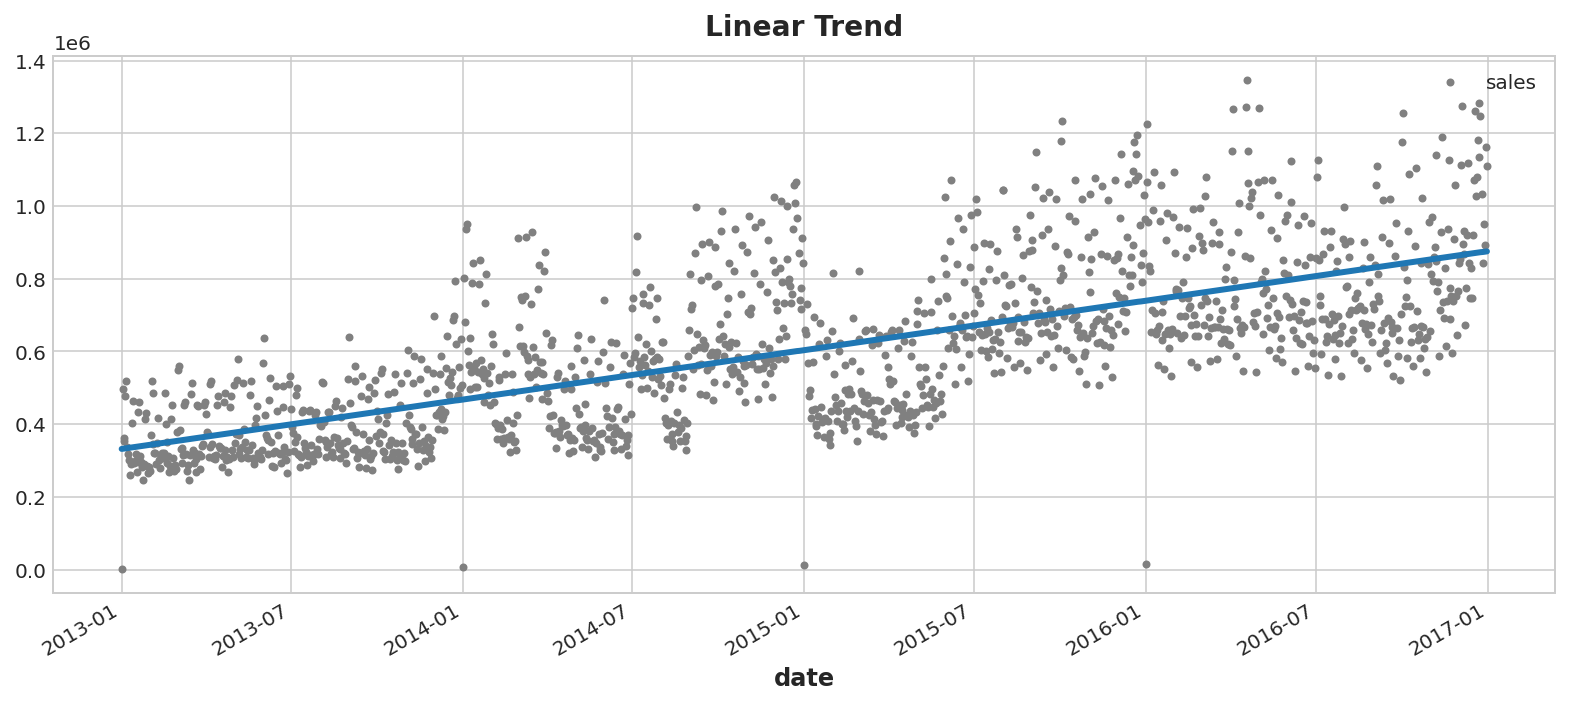

In [18]:
ax = train_1.plot(style=".", color="0.5", title="Linear Trend")
_=y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [19]:
# y_pred_trend to be used at last to combine it with cyclic features for better results
y_pred_trend=y_pred.copy()
y_pred_trend.head()

date
2013-01-01    331991.002180
2013-01-02    332364.074453
2013-01-03    332737.146725
2013-01-04    333110.218997
2013-01-05    333483.291269
dtype: float64

In [20]:
X = dp.out_of_sample(steps=90)
three_month_fore=model.predict(X)
y_fore = pd.Series(model.predict(X), index=pd.date_range(start='2017-01-01',end='2017-03-31'))
y_fore.head()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2017-01-01    875557.302762
2017-01-02    875930.375034
2017-01-03    876303.447306
2017-01-04    876676.519578
2017-01-05    877049.591850
Freq: D, dtype: float64

**PLOT FOR TREND FORECAST USING LINEAR REGRESSION** : FOR NEXT 3 MONTHS

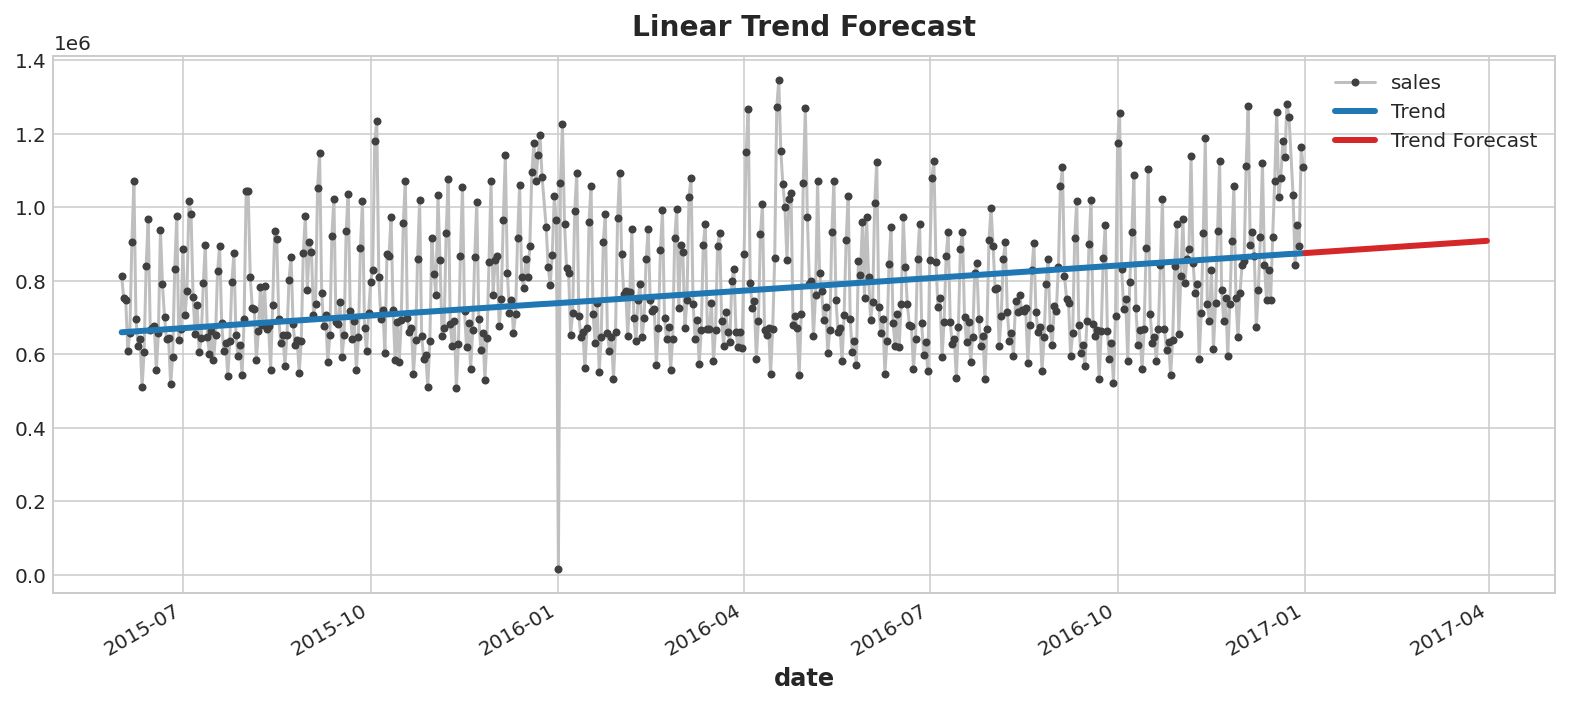

In [21]:
ax = train_1["2015-06-01":].plot(title="Linear Trend Forecast", **plot_params)
ax = y_pred["2015-06-01":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

**MEAN ABSOLUTE ERROR FOR NEXT 3 MONTHS IN THIS MODEL :**

In [22]:
from sklearn.metrics import mean_absolute_error
y_true=np.array(train_all_combined.loc['2017-01-01':'2017-03-31','sales'])
mae_1=mean_absolute_error(y_true,y_fore)
mae_1


165606.9172601119

**OBSERVATION :** A very bad mae

**INCLUDING SEASONAL FEATURES :**

In [23]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


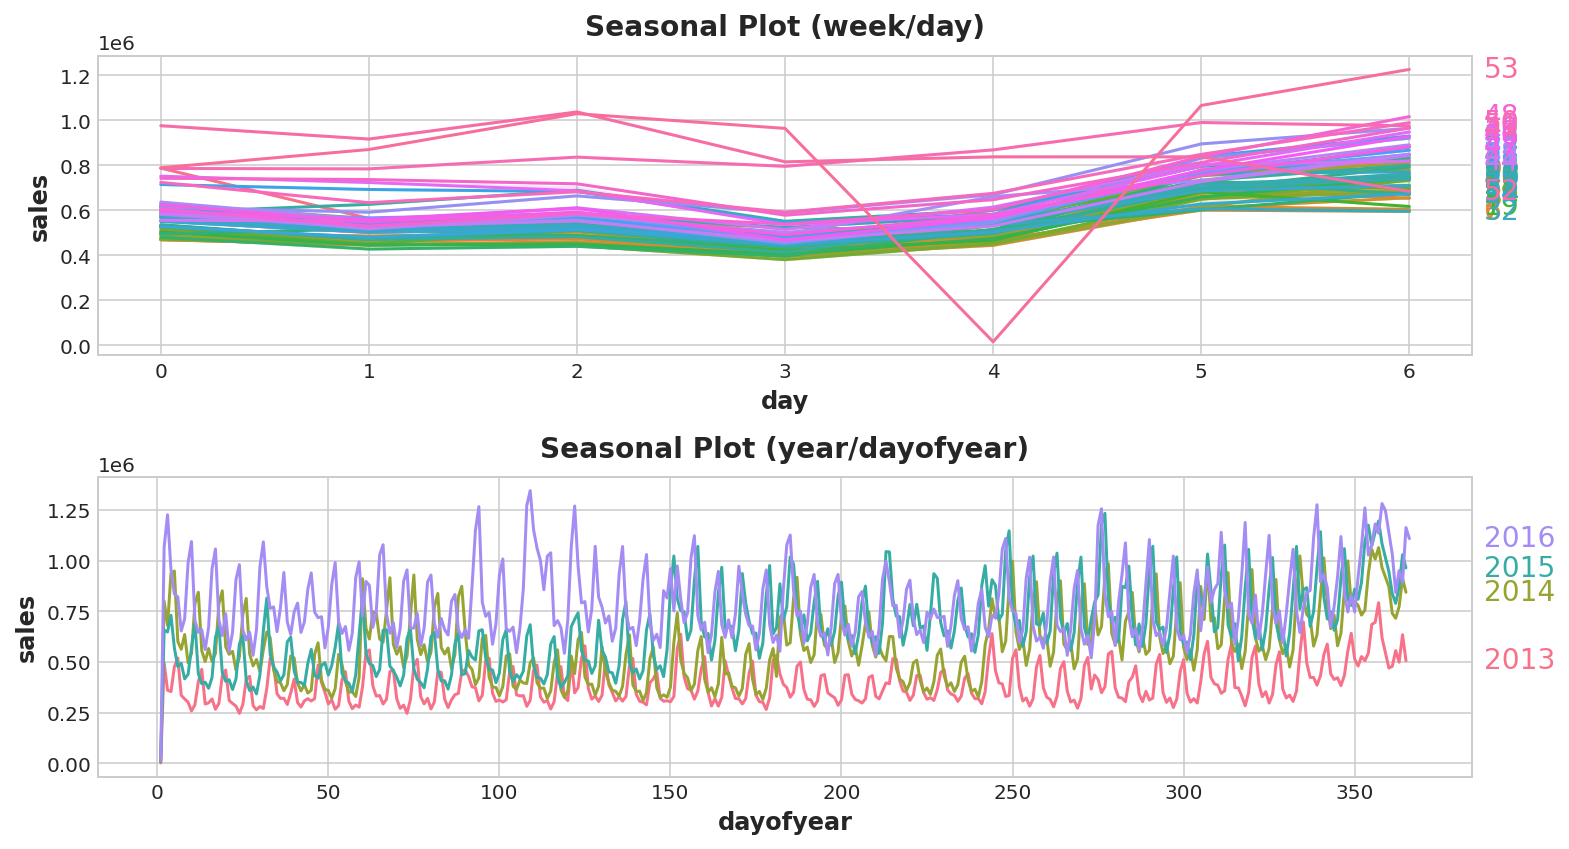

In [24]:
X = train_1.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="sales", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="sales", period="year", freq="dayofyear", ax=ax1);


**Plotting periodogram to see which seasonal features to use :**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  


<AxesSubplot:title={'center':'Periodogram'}, ylabel='Variance'>

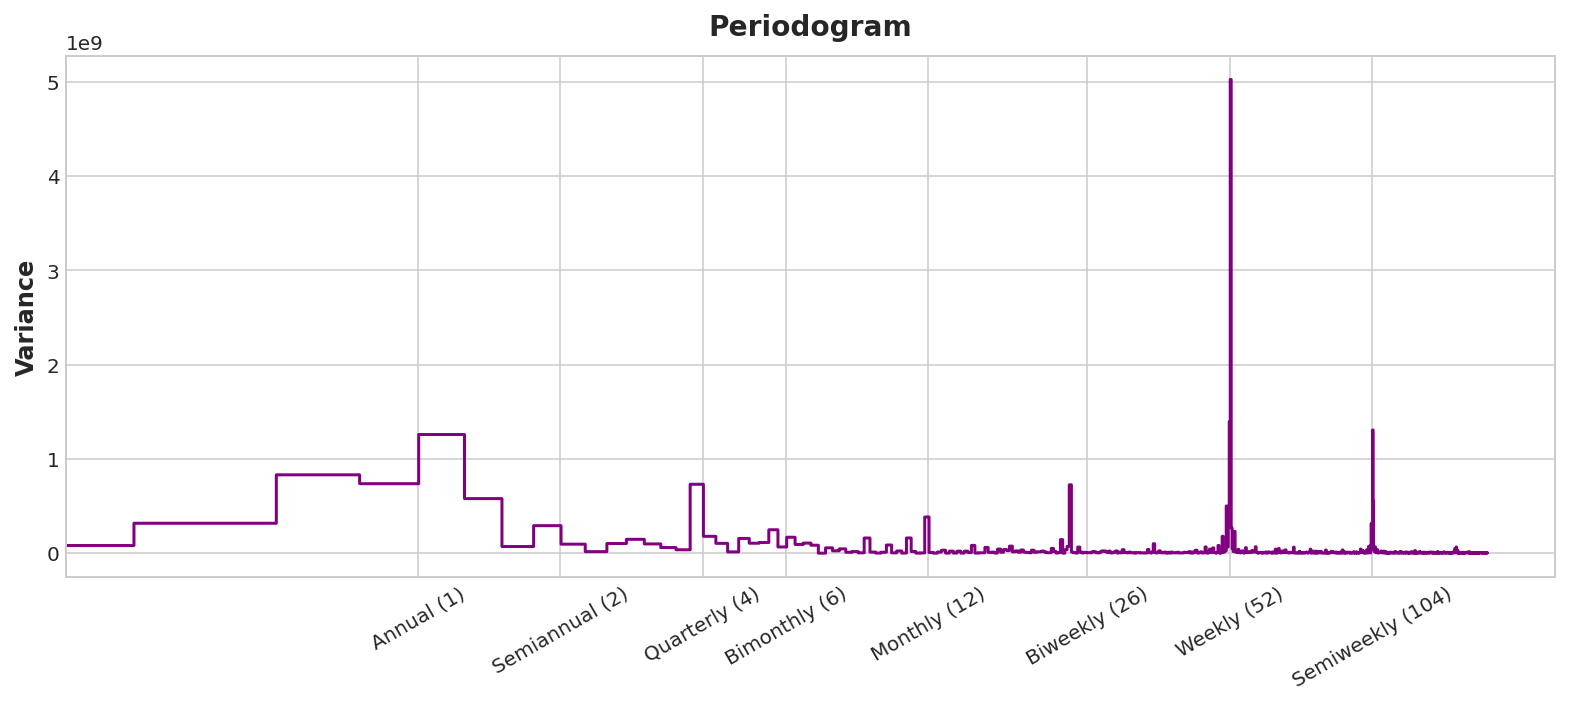

In [25]:
pp=train_1.loc['2013-01-01':'2016-12-31']
plot_periodogram(train_1.sales)

From the left we observe that Biweekly(26) is a large time frame which has variance. So we use Fourier features of order 26 below :

In [26]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

fourier = CalendarFourier(freq="A", order=26)  # 12 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=train_1.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,# weekly seasonality (indicators)
    period=7, 
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=False,                 # drop terms to avoid collinearity
)

X = dp.in_sample()
X.tail()

,const,trend,"s(2,7)","s(3,7)","s(4,7)","s(5,7)","s(6,7)","s(7,7)","sin(1,freq=A-DEC)","cos(1,freq=A-DEC)",...,"sin(22,freq=A-DEC)","cos(22,freq=A-DEC)","sin(23,freq=A-DEC)","cos(23,freq=A-DEC)","sin(24,freq=A-DEC)","cos(24,freq=A-DEC)","sin(25,freq=A-DEC)","cos(25,freq=A-DEC)","sin(26,freq=A-DEC)","cos(26,freq=A-DEC)"
date,,,,,,,,,,,,,,,,,,,,,
2016-12-27,1.0,1453.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.085731,0.996318,...,-0.949990,-0.312281,-0.919720,-0.392574,-0.882679,-0.469977,-0.839138,-0.543919,-0.789418,-0.613856
2016-12-28,1.0,1454.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.068615,0.997643,...,-0.998195,0.060049,-0.999963,-0.008583,-0.997018,-0.077175,-0.989372,-0.145404,-0.977064,-0.212947
2016-12-29,1.0,1455.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.051479,0.998674,...,-0.905702,0.423914,-0.926324,0.376728,-0.944489,0.328542,-0.960150,0.279486,-0.973264,0.229688
2016-12-30,1.0,1456.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.034328,0.999411,...,-0.685548,0.728028,-0.710135,0.704066,-0.733885,0.679273,-0.756771,0.653680,-0.778764,0.627317
2016-12-31,1.0,1457.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.017166,0.999853,...,-0.368763,0.929523,-0.384665,0.923056,-0.400454,0.916317,-0.416125,0.909308,-0.431673,0.902030


**Predicting for the next year :**

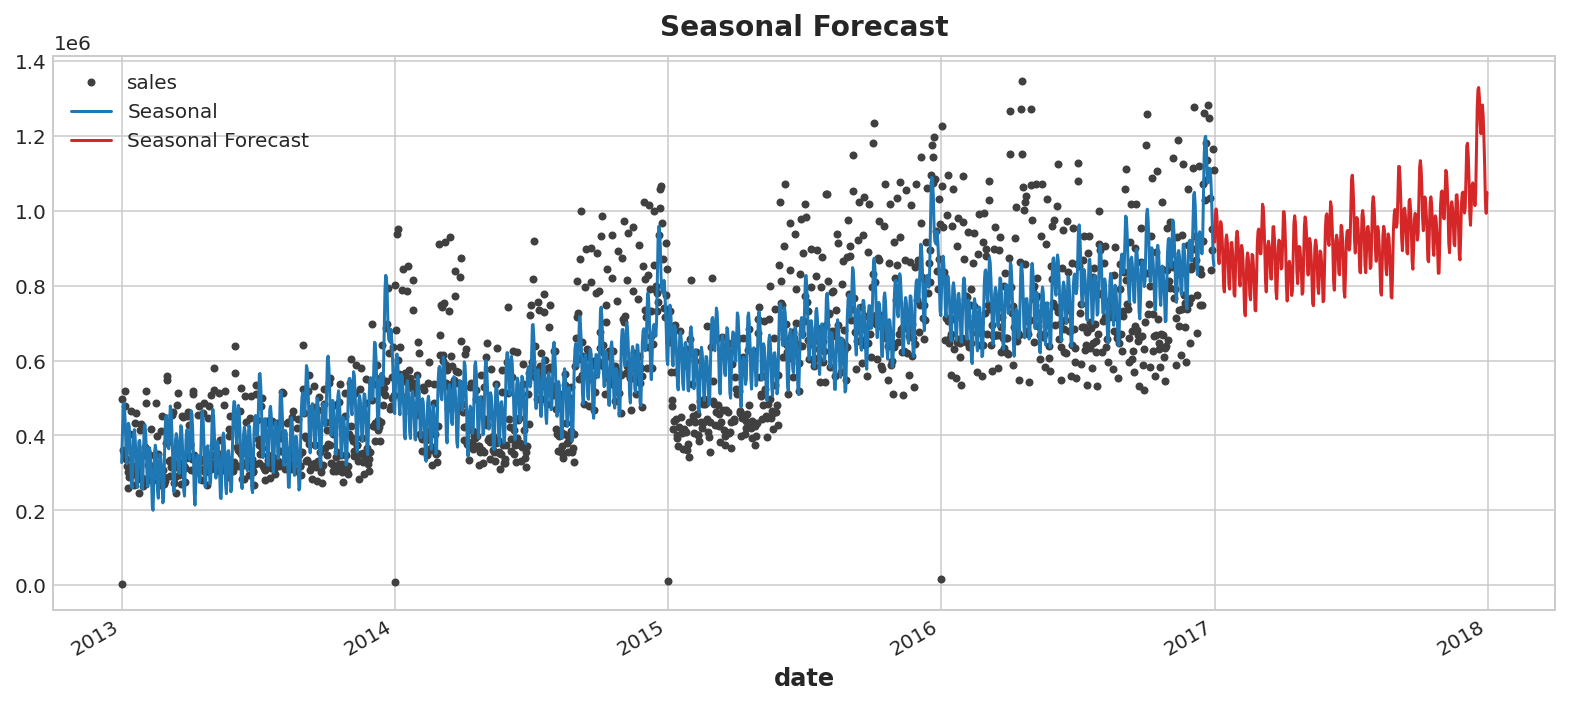

In [27]:
y = train_1["sales"]
y2=train_all_combined['sales']
model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)
X_fore = dp.out_of_sample(steps=365,forecast_index=pd.date_range('2017-01-01', periods=365))
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()

In [28]:
# y_deseasonalised to be used at last to combine it with cyclic features for better results
y_deseasonalised=(y-y_pred)

**MEAN ABSOLUTE ERROR :**

In [29]:
mae_2=mean_absolute_error(y_true,y_fore.loc[:'2017-03-31'])
mae_2

174438.95111345514

**OBSERVATION :** Still a very bad mae

**INCLUDING CYCLIC FEATURES :**

In [30]:
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig

from statsmodels.graphics.tsaplots import plot_pacf

In [31]:
xyz=y_deseasonalised.to_frame().copy()
# final contains the trend and deseasonalised sales
final=pd.DataFrame(index=xyz.index)

final["sales"]=y_deseasonalised
final["trend"]=y_pred_trend
final.tail()

,sales,trend
date,,
2016-12-27,-240459.325876,873691.941401
2016-12-28,-76273.319573,874065.013673
2016-12-29,-64477.303905,874438.085945
2016-12-30,291285.605432,874811.158217
2016-12-31,256520.061461,875184.230489


/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


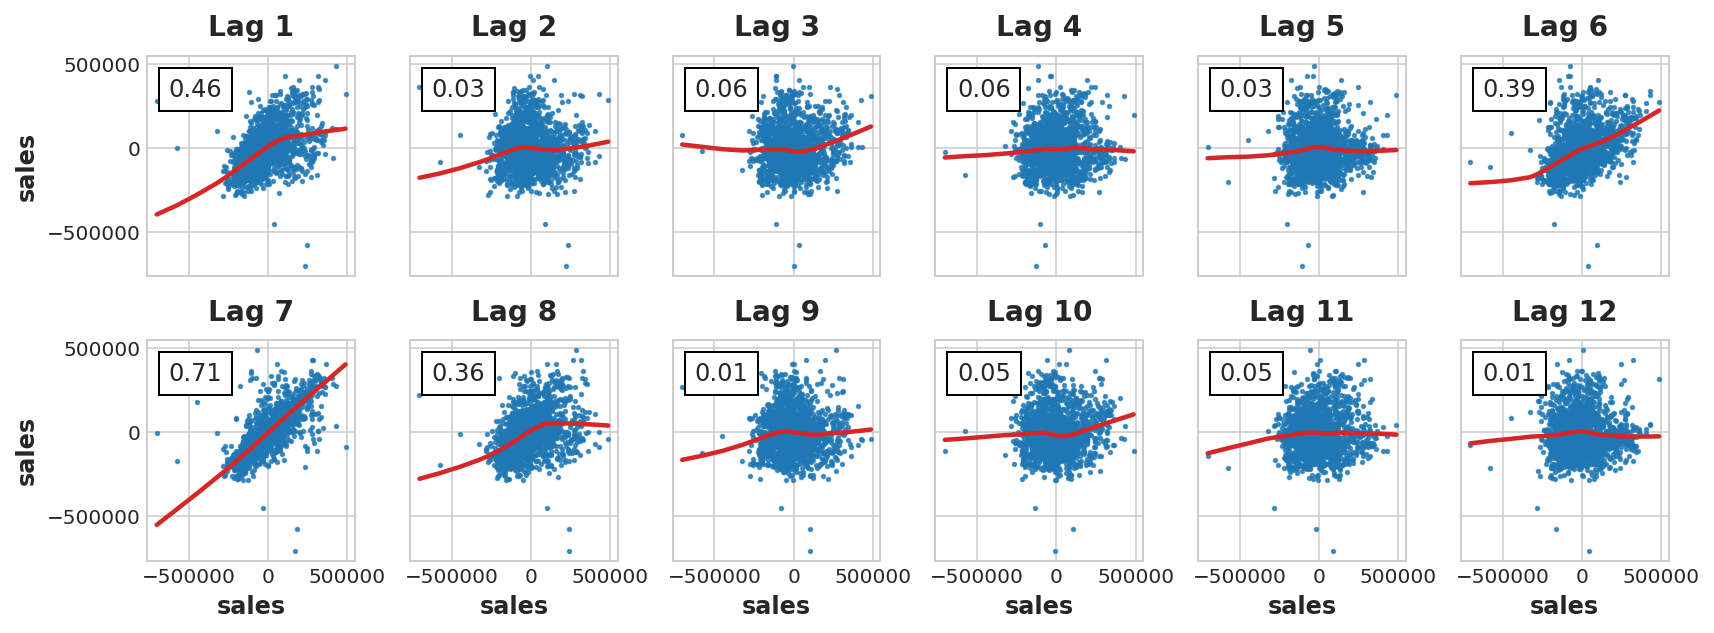

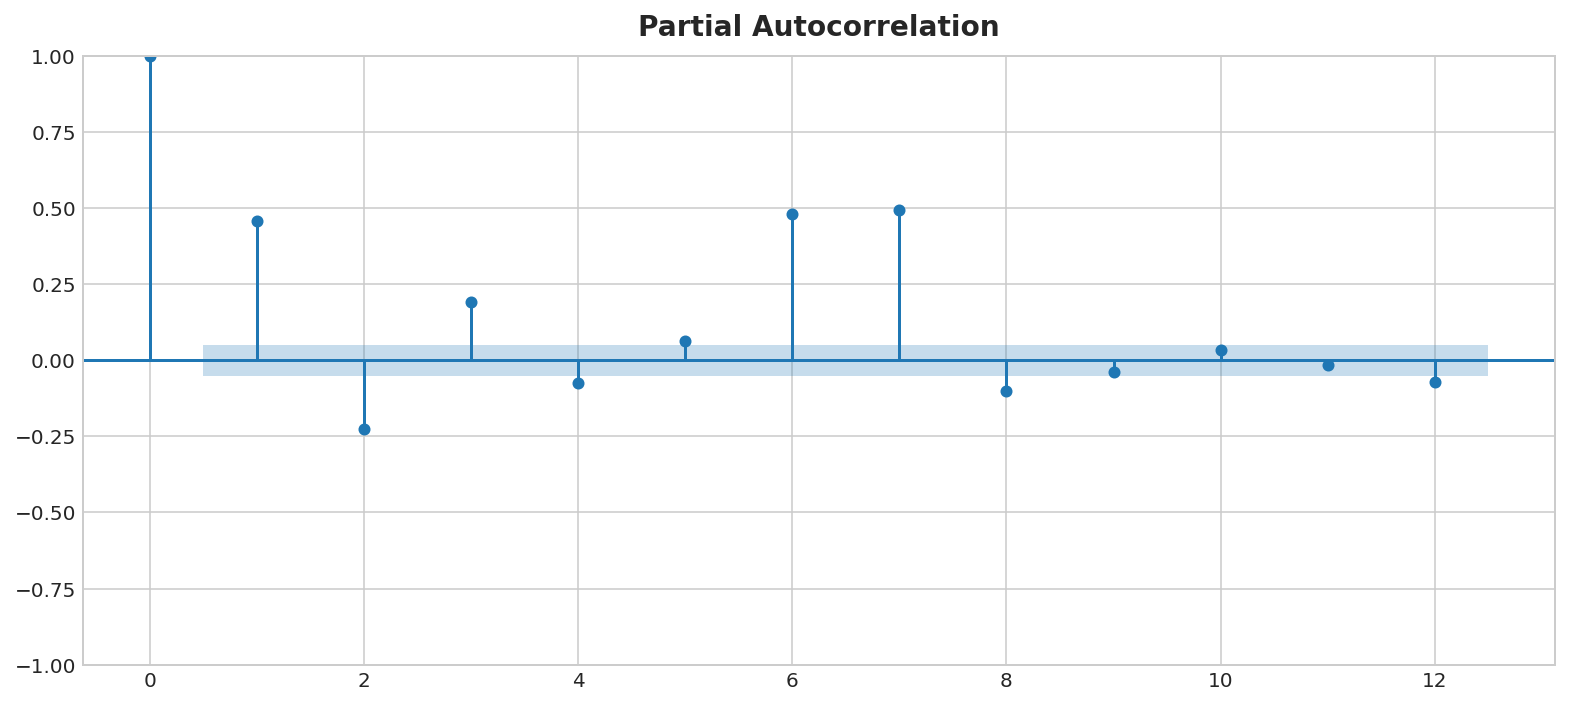

In [32]:
_ = plot_lags(final.sales, lags=12, nrows=2)
_ = plot_pacf(final.sales, lags=12)

**OBSERVATION :** Partial autocorrelation suggests that we can capture serial dependence using lags 1 through lag 8

In [33]:
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)


X = make_lags(final.sales, lags=8)
X = X.fillna(0.0)

In [34]:
X["trend"]=final["trend"]
X.head()

,y_lag_1,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6,y_lag_7,y_lag_8,trend
date,,,,,,,,,
2013-01-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,331991.002180
2013-01-02,-325062.853997,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,332364.074453
2013-01-03,100085.667796,-325062.853997,0.000000,0.000000,0.0,0.0,0.0,0.0,332737.146725
2013-01-04,-111867.899341,100085.667796,-325062.853997,0.000000,0.0,0.0,0.0,0.0,333110.218997
2013-01-05,-131930.955842,-111867.899341,100085.667796,-325062.853997,0.0,0.0,0.0,0.0,333483.291269


Using first 3 years as training data to predict the 4th year :

In [35]:
from sklearn.model_selection import train_test_split
y = final.sales.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=365, shuffle=False)

In [36]:
# Fit and predict
model = LinearRegression()  
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

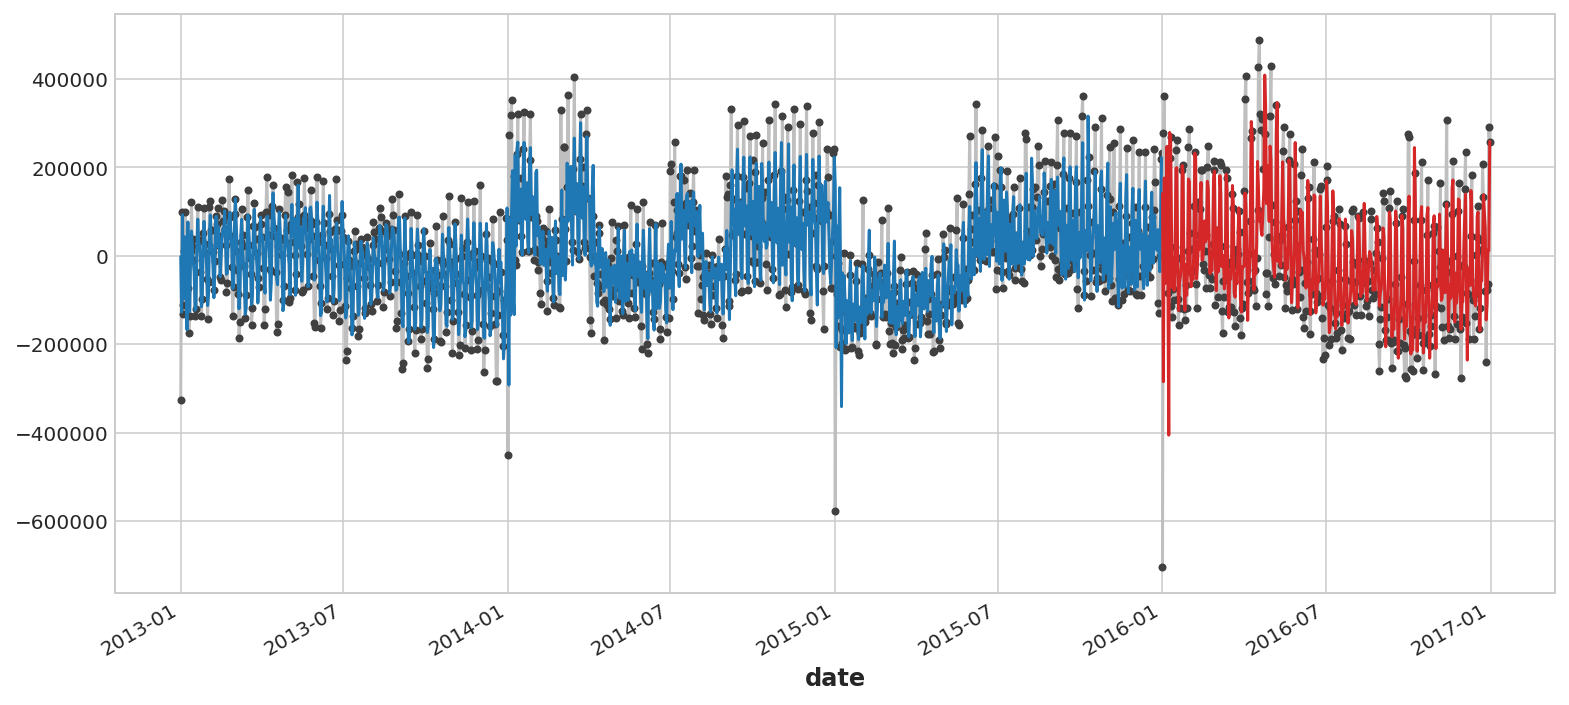

In [37]:
ax = y_train.plot(**plot_params)
ax = y_test.plot(**plot_params)
ax = y_pred.plot(ax=ax)
_ = y_fore.plot(ax=ax, color='C3')

Magnifying the predicted year :

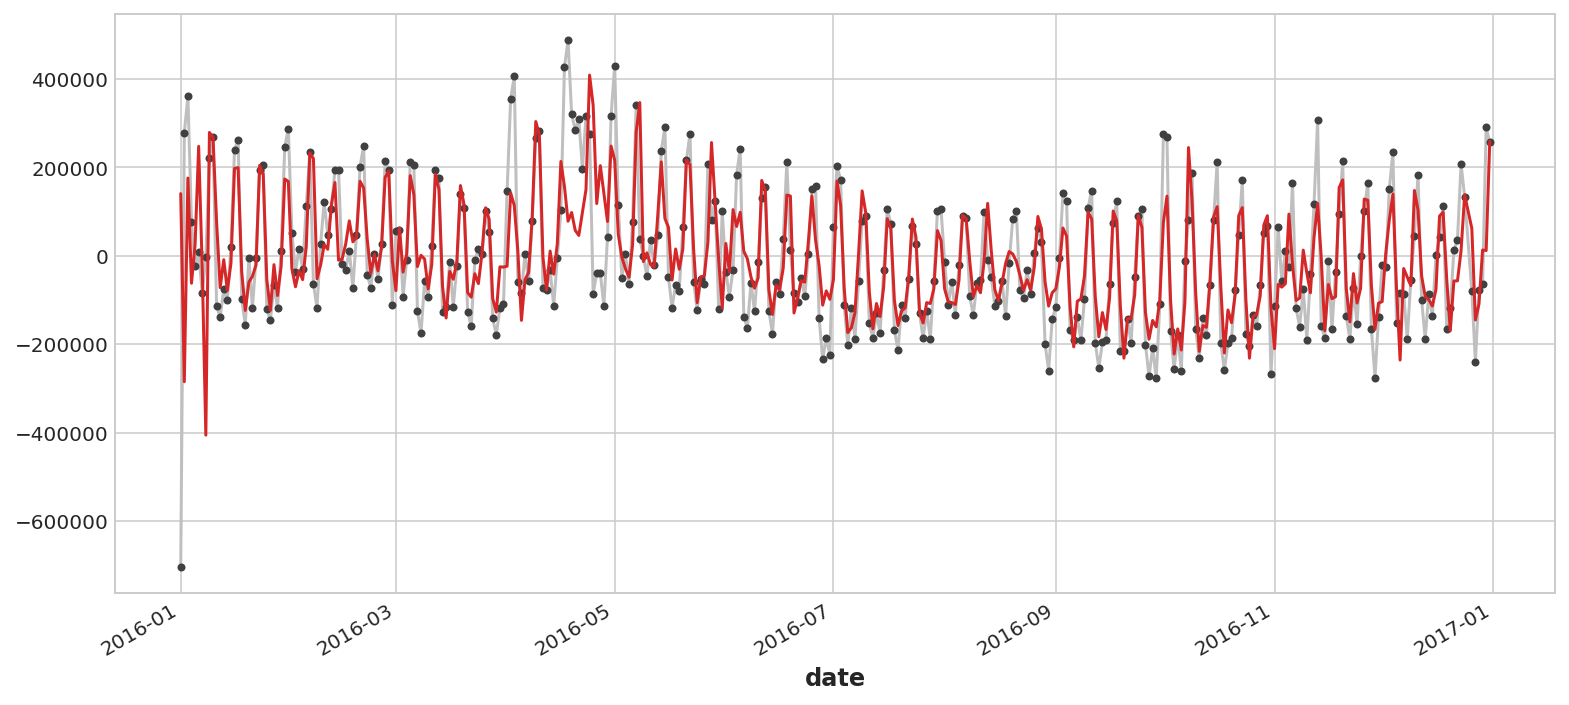

In [38]:
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')

In [39]:
mae_3=mean_absolute_error(y_test,y_fore)
mae_3

71992.0069341256

**OBSERVATION :** A significant improvement in mean absolute error when we combined all three features viz. trend,seasonality and serial dependence.
    Thus we got a model which can forecast store sales of upto a year with decent accuracy.

In [40]:
print("MAE_1 =", int(mae_1),"MAE_2 =",int(mae_2),"MAE_3 =",int(mae_3))

MAE_1 = 165606 MAE_2 = 174438 MAE_3 = 71992
